## **住宅価格の予測**

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Week3同様にKaggleからデータセットをダウンロードしてください。train.csvのみを使用します。

In [2]:
df = pd.read_csv("train.csv")
display(df)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


このデータセットには79種類の特徴量（目的変数）がありますが、Week3で探索して分かったように様々なタイプのデータ含まれています。これをどう前処理するかということは機械学習において重要な箇所ですが、今回は回帰問題の学習や評価の練習を優先するため、GrLivAreaとYearBuiltの2つだけを利用することにします。  

**【問題1】練習のために特徴量の選択**  
データセットを読み込んだ後、GrLivAreaとYearBuiltを抜き出してください。

In [3]:
df_1 = df.loc[:, ["GrLivArea", "YearBuilt", "SalePrice"]]
display(df_1)

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
5,1362,1993,143000
6,1694,2004,307000
7,2090,1973,200000
8,1774,1931,129900
9,1077,1939,118000


***

**【問題2】線形回帰による推定と評価**  
データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。


[sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)


評価のための指標値は回帰問題では 平均二乗誤差（Mean Squared Error, MSE） を使うことが一般的です。


[sklearn.metrics.mean_squared_error — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)


可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。

**＜EDA＞**

In [4]:
#記述統計
df_1.describe()

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


- 平均と最大値、最小値の関係をみると、GrLivAreaとSalePriceは分布に偏りがありそう。

/Users/itonaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


GrLivAreaの尖度：1.3665603560164552
YearBuiltの尖度：-0.613461172488183
SalePriceの尖度：1.8828757597682129
--------------
GrLivAreaの歪度：4.895120580693174
YearBuiltの歪度：-0.43955194159361977
SalePriceの歪度：6.536281860064529


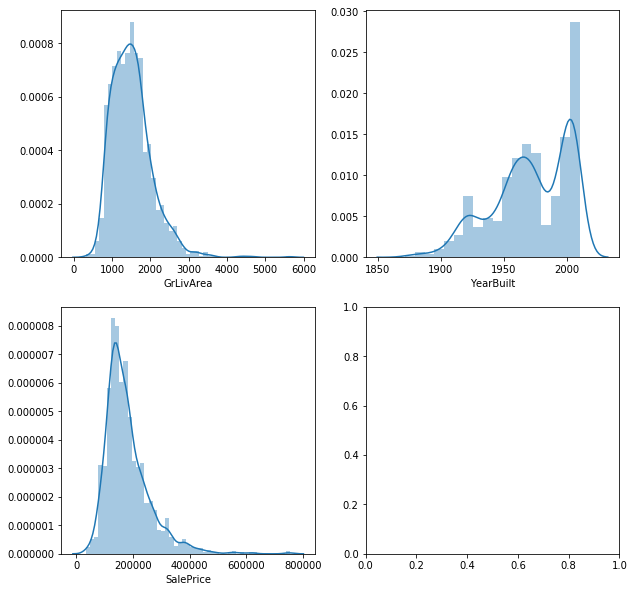

In [5]:
#ヒストグラム
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.distplot(df_1.GrLivArea, ax=axes[0, 0])
sns.distplot(df_1.YearBuilt, ax=axes[0, 1])
sns.distplot(df_1.SalePrice, ax=axes[1, 0])

#尖度
for feature in ["GrLivArea", "YearBuilt", "SalePrice"]:
    print(feature + "の尖度：{}".format(df_1[feature].skew()))
print("--------------")
#歪度
for feature in ["GrLivArea", "YearBuilt", "SalePrice"]:
    print(feature + "の歪度：{}".format(df_1[feature].kurt()))

- GrLivAreaとSalePriceに関しては、1山で左に偏った度数分布となっている。

,GrLivArea,YearBuilt,SalePrice
GrLivArea,1.000000,0.199010,0.708624
YearBuilt,0.199010,1.000000,0.522897
SalePrice,0.708624,0.522897,1.000000


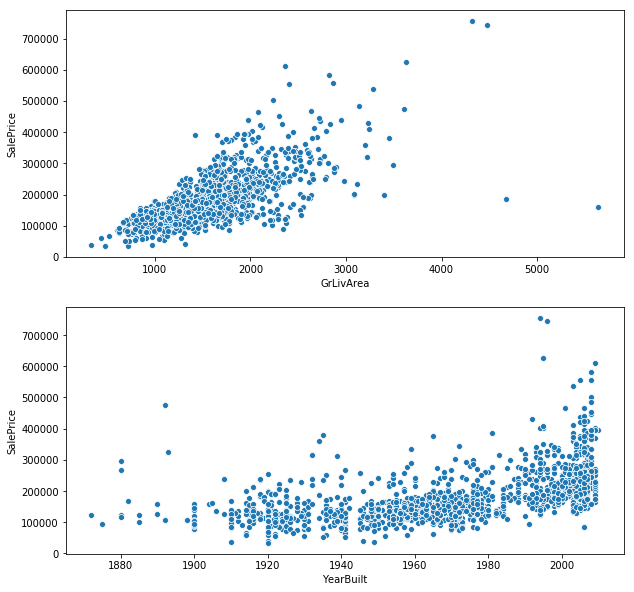

In [6]:
#SalePriceと特徴量の相関関係

fig, axes = plt.subplots(2, 1, figsize=(10, 10))

sns.scatterplot(data=df_1, x="GrLivArea", y="SalePrice", ax=axes[0])
sns.scatterplot(data=df_1, x="YearBuilt", y="SalePrice", ax=axes[1])

df_1.corr()

- SalwPriceとGrLivAreaは相関がありそう。広い方が高価格。
- SalwPriceとYearBuiltは、弱い相関がありそう。新しい住宅の方が高価格の傾向有り。
- 外れ値がポツポツとあり、予測モデル作成時には消しておいた方がモデル精度が出そう。

In [7]:
#欠損値の数

df_1.isnull().sum()

GrLivArea    0
YearBuilt    0
SalePrice    0
dtype: int64

- 欠損値はない

**＜前処理＞**

In [8]:
#訓練データと検証データに分割

X, y = df_1.loc[:, ["GrLivArea", "YearBuilt"]].values, df_1.loc[:, "SalePrice"].values

from sklearn.model_selection import train_test_split
# train_test_splitはデフォルトで訓練データ75％、検証データ25％
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [9]:
#標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)
#y_train_scaler = scaler.transform(y_train)
#y_test_scaler = scaler.transform(y_test)

/Users/itonaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/itonaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/itonaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


- YearBuiltを標準化する意味がいまいちわからないがひとまずやってみる・・・。
- SalePriceの標準化を試みたらエラー発生。yはyでscalerをつくる必要有り？

**＜学習、推定、評価＞**

Test set accuracy:0.5871035359601553
Train set accuracy:0.6769659997783976
平均二乗誤差:2725908099.063638


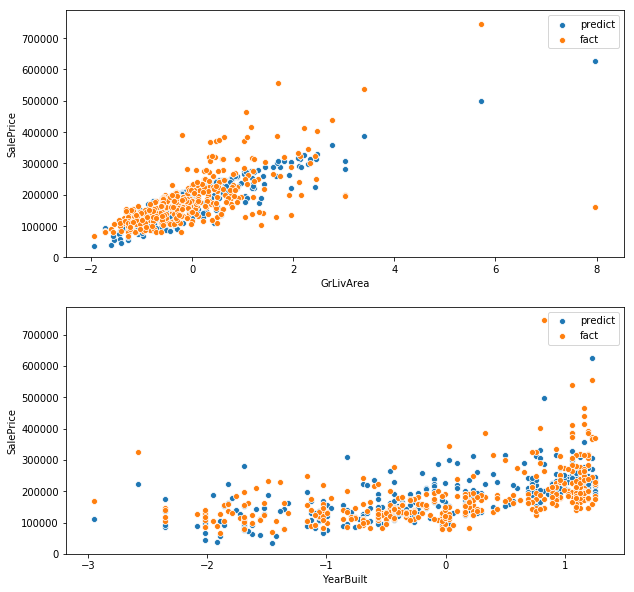

In [10]:
#標準化したデータで予測モデルの生成
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression().fit(X_train_scaler, y_train)
#print("Test set predictions:\n{}".format(lr.predict(X_test_scaler)))
print("Test set accuracy:{}".format(lr.score(X_test_scaler, y_test)))
print("Train set accuracy:{}".format(lr.score(X_train_scaler, y_train)))
print("平均二乗誤差:{}".format(mean_squared_error(y_test, lr.predict(X_test_scaler))))

#可視化(GrLivArea---predict SalePrice)
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
axes[0].set_xlabel("GrLivArea")
axes[0].set_ylabel("SalePrice")
sns.scatterplot(x=X_test_scaler[:, 0], y=lr.predict(X_test_scaler), label="predict", ax=axes[0])
sns.scatterplot(x=X_test_scaler[:, 0], y=y_test, label="fact", ax=axes[0])

#可視化(YearBuilt---predict_SalePrice)
axes[1].set_xlabel("YearBuilt")
axes[1].set_ylabel("SalePrice")
sns.scatterplot(x=X_test_scaler[:, 1], y=lr.predict(X_test_scaler), label="predict", ax=axes[1])
sns.scatterplot(x=X_test_scaler[:, 1], y=y_test, label="fact", ax=axes[1])

Test set accuracy:0.5871035359601553
Train set accuracy:0.6769659997783976
平均二乗誤差:2725908099.0636377


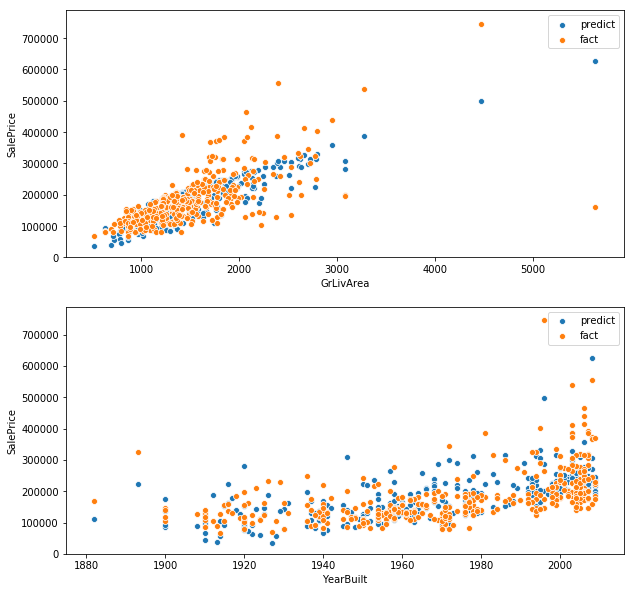

In [11]:
#標準化していないデータで予測モデルの生成

lr1 = LinearRegression().fit(X_train, y_train)
#print("Test set predictions:\n{}".format(lr1.predict(X_test)))
print("Test set accuracy:{}".format(lr1.score(X_test, y_test)))
print("Train set accuracy:{}".format(lr1.score(X_train, y_train)))
print("平均二乗誤差:{}".format(mean_squared_error(y_test, lr1.predict(X_test))))

#可視化(GrLivArea---predict SalePrice)
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
axes[0].set_xlabel("GrLivArea")
axes[0].set_ylabel("SalePrice")
sns.scatterplot(x=X_test[:, 0], y=lr1.predict(X_test), label="predict", ax=axes[0])
sns.scatterplot(x=X_test[:, 0], y=y_test, label="fact", ax=axes[0])

#可視化(YearBuilt---predict_SalePrice)
axes[1].set_xlabel("YearBuilt")
axes[1].set_ylabel("SalePrice")
sns.scatterplot(x=X_test[:, 1], y=lr1.predict(X_test), label="predict", ax=axes[1])
sns.scatterplot(x=X_test[:, 1], y=y_test, label="fact", ax=axes[1])

- 標準化してもしなくても、評価指標値が変化しない・・。やり方がおかしい・・？
- 予測したSalePriceと各特徴量間の可視化について、実際の値と重ねてみると似たような分布になっているのである程度うまく予測ができているように思える。
- その反面、正解率が低かったり、平均2乗誤差の値が大きいのでうまく予測モデルができているのか不明である。そもそもやり方が合っているのか、それとも前処理（対数変換等）が不足していてこのような評価結果になっているのか不明

***

**【問題3】手法の比較**  
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。


- 線形回帰
- SVM
- 決定木
- ランダムフォレスト

公式ドキュメントへのリンクは以下です。本来はパラメータチューニングを行いますが、まずはデフォルトの値で実行しましょう。

[sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)  
[sklearn.svm.SVR — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)  
[sklearn.tree.DecisionTreeRegressor — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)  
[sklearn.ensemble.RandomForestRegressor — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)


In [12]:
def result_each_method(model):
    """
    入力したモデルで予測モデルをつくり、評価指標とグラフを作成する関数
    
    Parameter
    ---------
    model：モデル 
    """
    instance = model.fit(X_train_scaler, y_train)
    print("平均二乗誤差:{:.2f}".format(mean_squared_error(y_test, instance.predict(X_test_scaler))))
    print("Test set accuracy:{:.2f}".format(instance.score(X_test_scaler, y_test)))
    
    #可視化(GrLivArea---predict SalePrice)
    fig, axes = plt.subplots(2, 1, figsize=(10, 10))
    axes[0].set_xlabel("GrLivArea")
    axes[0].set_ylabel("SalePrice")
    sns.scatterplot(x=X_test_scaler[:, 0], y=instance.predict(X_test_scaler), label="predict", ax=axes[0])
    sns.scatterplot(x=X_test_scaler[:, 0], y=y_test, label="fact", ax=axes[0])

    #可視化(YearBuilt---predict_SalePrice)
    axes[1].set_xlabel("YearBuilt")
    axes[1].set_ylabel("SalePrice")
    sns.scatterplot(x=X_test_scaler[:, 1], y=instance.predict(X_test_scaler), label="predict", ax=axes[1])
    sns.scatterplot(x=X_test_scaler[:, 1], y=y_test, label="fact", ax=axes[1])


平均二乗誤差:2725908099.06
Test set accuracy:0.59


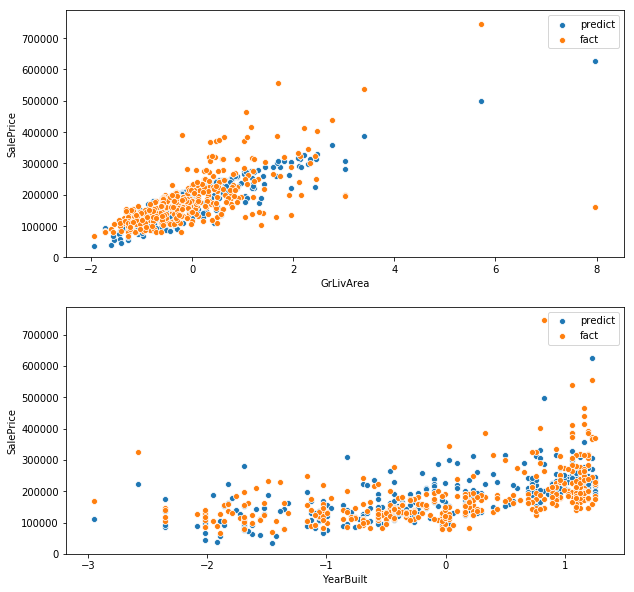

In [13]:
#線形回帰
result_each_method(LinearRegression())

平均二乗誤差:6943346839.26
Test set accuracy:-0.05


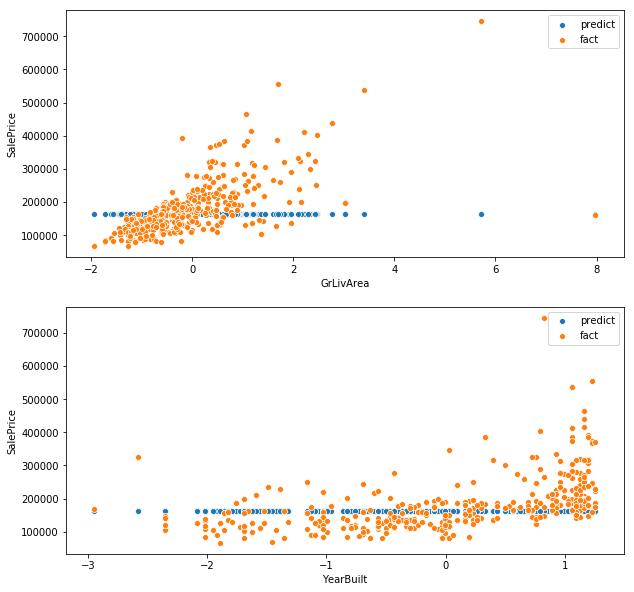

In [14]:
#SVC
from sklearn.svm import SVR
result_each_method(SVR())

平均二乗誤差:3255584992.05
Test set accuracy:0.51


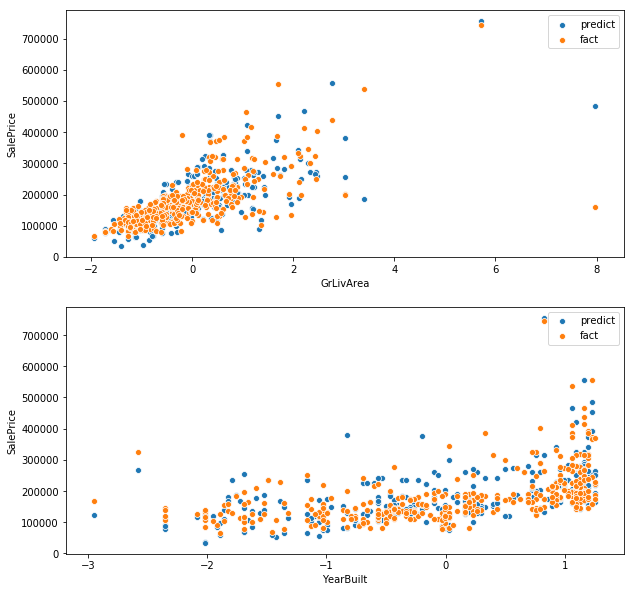

In [15]:
#決定木
from sklearn.tree import DecisionTreeRegressor
result_each_method(DecisionTreeRegressor())

/Users/itonaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


平均二乗誤差:1819879187.22
Test set accuracy:0.72


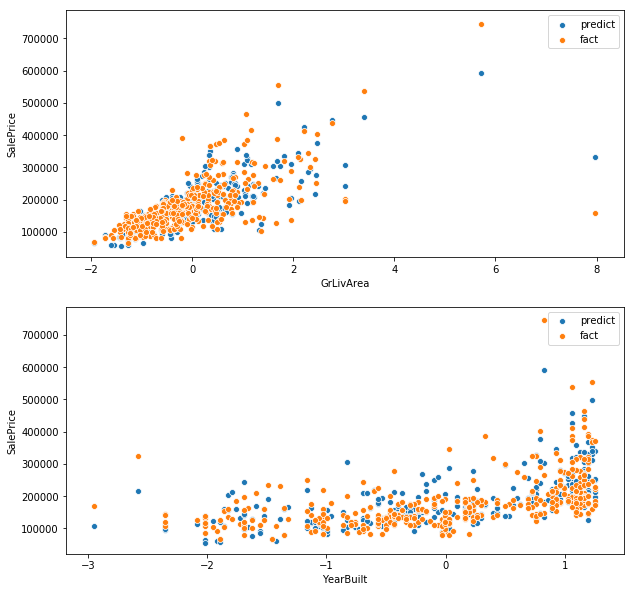

In [16]:
#ランダムフォレスト
from sklearn.ensemble import RandomForestRegressor
result_each_method(RandomForestRegressor())

|---|平均二乗誤差|正解率(accuracy)|
|-|-|-|
|線形回帰               |2725908099.06|0.59|
|SVM                    |6943346839.26|-0.05|
|決定木                  |3305130691.45|0.50|
|ランダムフォレスト |1932576868.04|0.71|

- 今回の前処理で予測モデルを作成した場合、ランダムフォレストが一番予測精度の高いモデルと言える。平均二乗誤差の値は一番小さく、正解率も一番高い。
- SVMの予測値がおかしい。何かやり方を間違えていそう・・。